In [1]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [10]:
bom = yf.Ticker("BBD-B.TO")
bom.info

{'address1': '400 COte-Vertu Road West',
 'city': 'Dorval',
 'state': 'QC',
 'zip': 'H4S 1Y9',
 'country': 'Canada',
 'phone': '514 240 9649',
 'website': 'https://www.bombardier.com',
 'industry': 'Aerospace & Defense',
 'industryKey': 'aerospace-defense',
 'industryDisp': 'Aerospace & Defense',
 'sector': 'Industrials',
 'sectorKey': 'industrials',
 'sectorDisp': 'Industrials',
 'longBusinessSummary': 'Bombardier Inc. engages in the manufacture and sale of business aircraft and aircraft structural components in Europe, North America, the Asia Pacific, and internationally. It provides new aircraft, specialized aircraft solutions, and pre-owned aircraft. The company also offers aftermarket services, including parts, smart services, service centers, training, and technical publications. It serves multinational corporations, charter and fractional ownership providers, governments, and private individuals. The company was incorporated in 1902 and is based in Dorval, Canada.',
 'fullTimeEm

In [26]:
hist = bom.history(period='120mo')
bomdf = pd.DataFrame(hist)
bomdf.shape

(2509, 7)

In [27]:
bomdf[::-1].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-23 00:00:00-05:00,48.500000,49.380001,46.770000,49.000000,492306,0.0,0.0
2024-01-22 00:00:00-05:00,51.900002,52.084999,48.509998,48.520000,612987,0.0,0.0
2024-01-19 00:00:00-05:00,52.049999,52.400002,50.810001,51.959999,238841,0.0,0.0
2024-01-18 00:00:00-05:00,52.000000,52.500000,51.299999,52.110001,148801,0.0,0.0
2024-01-17 00:00:00-05:00,51.360001,51.750000,50.770000,51.630001,227414,0.0,0.0


In [28]:
bomdf.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

# Plotting Bombardier Stock trends for last 10 years

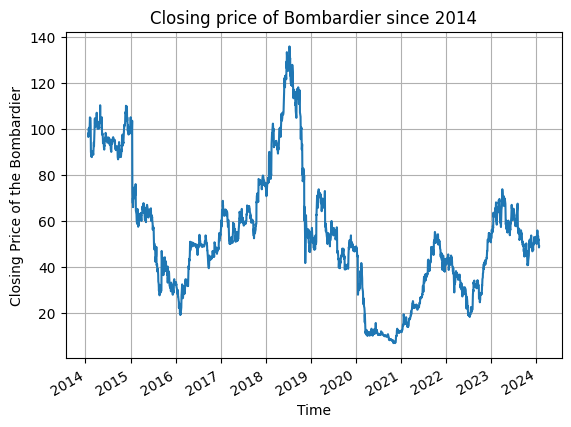

In [29]:
bomdf['Close'].plot()
plt.ylabel('Closing Price of the Bombardier')
plt.xlabel('Time')
plt.title('Closing price of Bombardier since 2014')
plt.grid()

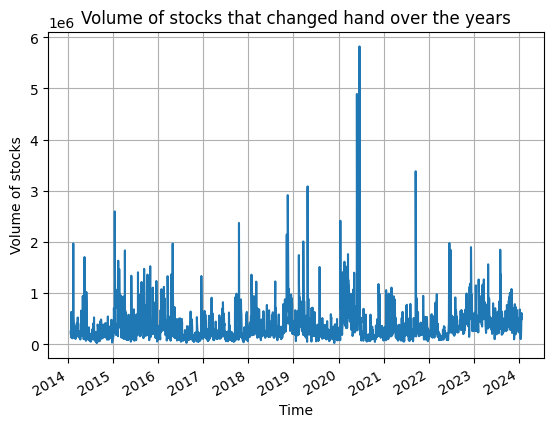

In [30]:
#Plotting the volume of stocks being traded each day for the last year
bomdf['Volume'].plot()
plt.ylabel('Volume of stocks')
plt.xlabel('Time')
plt.title('Volume of stocks that changed hand over the years')
plt.grid()

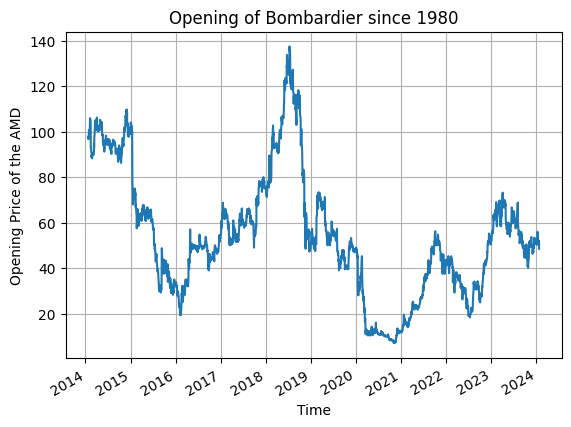

In [32]:
bomdf['Open'].plot()
plt.ylabel('Opening Price of the AMD')
plt.xlabel('Time')
plt.title('Opening of Bombardier since 1980')
plt.grid()

In [33]:
bomdf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-23 00:00:00-05:00,96.960173,98.459557,96.710276,97.959763,245678,0.0,0.0
2014-01-24 00:00:00-05:00,97.959765,98.459559,95.710688,96.460381,195632,0.0,0.0
2014-01-27 00:00:00-05:00,96.960174,97.459969,96.210482,97.459969,170802,0.0,0.0
2014-01-28 00:00:00-05:00,98.459550,101.208421,97.709858,100.208832,633861,0.0,0.0
2014-01-29 00:00:00-05:00,100.708632,100.958529,98.959351,98.959351,248642,0.0,0.0


In [34]:
X = bomdf[['Open', 'High', 'Low', 'Volume']]
y = bomdf['Close']

# Splitting into training and test set

In [35]:
train_size = int(len(X)*0.8)
test_size = len(X) - train_size

X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Scaling the data 

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

# Define the model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation='ReLu', ))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')